In [64]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib notebook

<IPython.core.display.Javascript object>


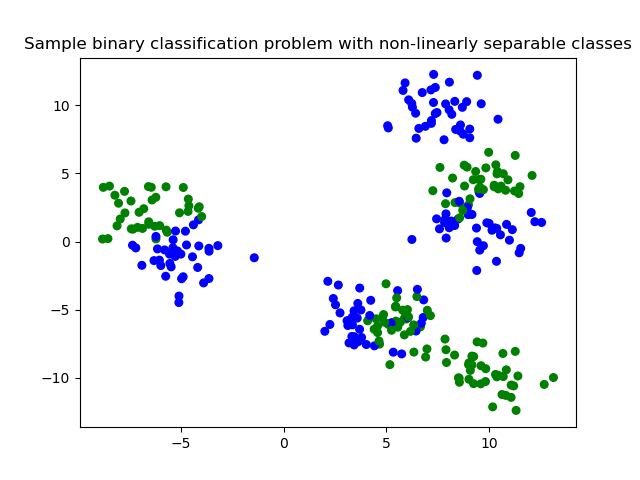

In [65]:
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed = 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0, shuffle= True)
print(f'X_train.shape = {X_train.shape[0]}, y_train.shape = {y_train.shape[0]}')
print(f'X_test.shape = {X_test.shape[0]}, y_test.shape = {y_test.shape[0]}')

X_train.shape = 225, y_train.shape = 225
X_test.shape = 75, y_test.shape = 75


In [67]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)    
X_test = scaler.transform(X_test)
print(X_train[0:5])

[[ 0.7310468   1.88759955]
 [-0.09315299 -0.68498838]
 [ 0.66404826  0.43739056]
 [-1.78538719  0.5656113 ]
 [ 0.67592953  0.4526533 ]]


In [68]:
q_rate=[]
for i in range (1, 51):
    knn_temp = KNeighborsClassifier(n_neighbors=i)
    knn_temp.fit(X_train, y_train)
    predict_i = knn_temp.predict(X_test)
    q_rate.append(np.mean(predict_i != y_test))

<IPython.core.display.Javascript object>


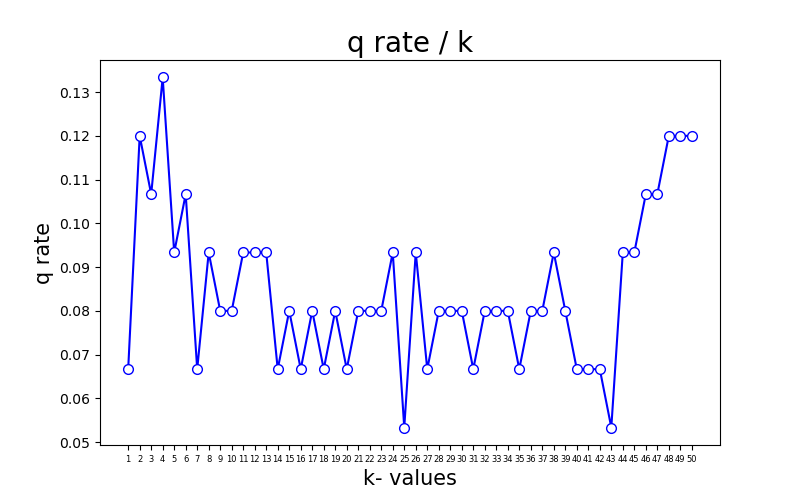

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(range(1,51), q_rate, marker="o", markerfacecolor="w", color="blue", markersize=7)
plt.title("q rate / k",fontsize=20)
plt.xlabel("k- values",fontsize=15)
plt.ylabel("q rate",fontsize=15)
plt.xticks(range(1,51), fontsize=6)
plt.show()

In [70]:
k_best = 25
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_train, y_train)
score_best = knn.score(X_test, y_test)
print (f'The best k = {k_best} , score = {score_best}')

The best k = 25 , score = 0.9466666666666667


<IPython.core.display.Javascript object>


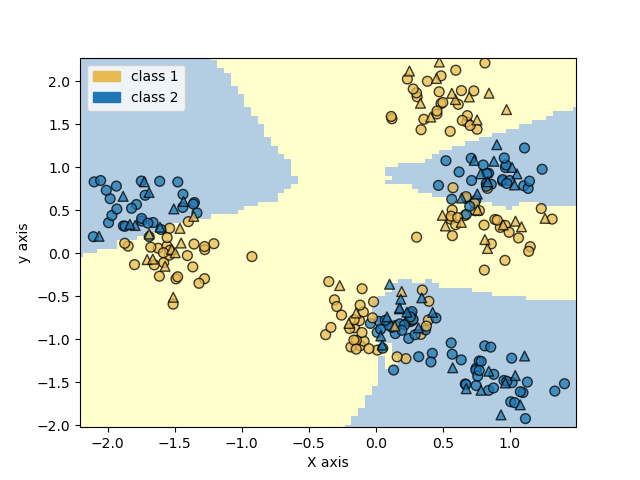

In [71]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50):
    colors_for_areas= [mpl.cm.Pastel1(.6), mpl.cm.Pastel1(.2)]
    colors_for_points = [mpl.cm.tab20b(.5), mpl.cm.Paired(.1)]
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold  = ListedColormap(colors_for_points)

    mesh_step_size = precision

    X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    Z = clf.predict(target_samples_grid)
    Z = Z.reshape(xx1.shape)
    
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    patch0 = mpatches.Patch(color=colors_for_points[0], label='class 1')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='class 2')
    plt.legend(handles=[patch0, patch1])
    plt.title(title)

    plt.xlabel('X axis')
    plt.ylabel('y axis')

    plt.show()
    
plot_decision_boundary(knn, X_train, y_train, X_test, y_test)